## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
import os

os.getcwd()

'c:\\Users\\rachi\\Downloads'

In [3]:
df=pd.read_excel('c:\\Users\\rachi\\Downloads\\flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
## get the basics info about data
df.info() 
df.isnull().sum() #Route, Total_Stops has one row null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.describe() ##it seems right skewed

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [112]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<Axes: xlabel='Price', ylabel='Count'>

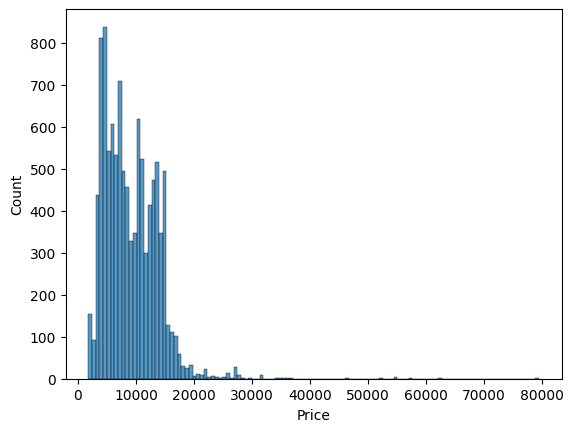

In [23]:
# df['Price'].plot(kind= 'hist', bin = 100)
sns.histplot(data= df, x= 'Price')

<Axes: ylabel='Price'>

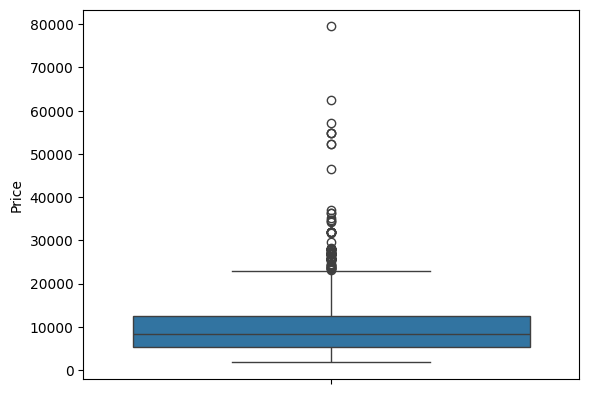

In [25]:
sns.boxplot(data= df, y= 'Price') ##It is more or less Outliers

In [39]:
##Target Ordinal Encoding
df.groupby(['Airline']).agg({'Airline':'count', 'Price':'median'}).rename({'Airline':'count'}, axis=1).reset_index()

air1 = df.groupby(['Airline']).agg({'Price':'median'}).rename({'Airline':'count'}, axis=1).reset_index()
air1

df['Airline_target_encoding'] = df['Airline'].apply(lambda x: int(air1.loc[air1['Airline'] == x,'Price']) )

C:\Users\rachi\AppData\Local\Temp\ipykernel_94912\3103696686.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Airline_target_encoding'] = df['Airline'].apply(lambda x: int(air1.loc[air1['Airline'] == x,'Price']) )


In [ ]:
df.head() ##Airline

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_target_encoding
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,5000
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,9443
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,11467
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5000
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,5000


In [48]:
df['Date_day'] = df['Date_of_Journey'].str.split("/").str[0].astype('int')
df['Date_month'] = df['Date_of_Journey'].str.split("/").str[1].astype('int')
df['Date_year'] = df['Date_of_Journey'].str.split("/").str[-1].astype('int')

In [62]:
df.shape

(10683, 15)

In [63]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_target_encoding,Date_day,Date_month,Date_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,5000,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,9443,1,5,2019


In [113]:
##Nominal Encoding
from sklearn.preprocessing import OneHotEncoder
ohe_source = OneHotEncoder(sparse_output= False)

source = pd.DataFrame(ohe_source.fit_transform(df[['Source']]).tolist(), columns= ohe_source.get_feature_names_out())

###Destination
ohe_desti = OneHotEncoder(sparse_output= False)

desti = pd.DataFrame(ohe_desti.fit_transform(df[['Destination']]).tolist(), columns= ohe_desti.get_feature_names_out())

df_OHE = pd.concat([source,desti], axis= 1) ##Remove Destination, Source


###Additional_info
ohe_Additional_info = OneHotEncoder(sparse_output= False)

Additional_info = pd.DataFrame(ohe_Additional_info.fit_transform(df[['Additional_Info']]).tolist(), columns= ohe_Additional_info.get_feature_names_out())

df_OHE = pd.concat([source,desti, Additional_info], axis= 1) ##Remove Destination, Source

In [92]:
##Total Duration
df['Duration_mins'] =df['Duration'].str.split(' ').str[0].apply(lambda x:'0h' if 'm' in x else x).str.replace('h','').astype('int').apply(lambda x: x*60)+\
df['Duration'].str.split(' ').str[-1].apply(lambda x:'0m' if 'h' in x else x).str.replace('m','').astype('int')

In [96]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_target_encoding,Date_day,Date_month,Date_year,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,5000,24,3,2019,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,9443,1,5,2019,445


In [99]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
df['Total_Stops_Cat'] =df['Total_Stops'].apply(lambda x: \
                                               {'non-stop':5, np.nan:5, '1 stop':4, '2 stops':3, '3 stops':2, '4 stops':1}.get(x))

In [106]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_target_encoding,Date_day,Date_month,Date_year,Duration_mins,Total_Stops_Cat
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,5000,24,3,2019,170,5
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,9443,1,5,2019,445,3
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,11467,9,6,2019,1140,3


In [117]:
df2 = df.drop(['Airline','Date_of_Journey', 'Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Additional_Info','Total_Stops'], axis =1)

In [118]:
df2.head()

,Price,Airline_target_encoding,Date_day,Date_month,Date_year,Duration_mins,Total_Stops_Cat
0,3897,5000,24,3,2019,170,5
1,7662,9443,1,5,2019,445,3
2,13882,11467,9,6,2019,1140,3
3,6218,5000,12,5,2019,325,4
4,13302,5000,1,3,2019,285,4


In [121]:
pd.set_option('display.max_columns', None)
df_final = pd.concat([df2,df_OHE], axis= 1)

In [122]:
df_final.head(2)

,Price,Airline_target_encoding,Date_day,Date_month,Date_year,Duration_mins,Total_Stops_Cat,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897,5000,24,3,2019,170,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7662,9443,1,5,2019,445,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
